# Mall Customers 
## Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Exploratory Data Analysis (EDA)</li>
<li>Applying KMeans Algorithm</li>
<li>Applying Hierarchical Clustering Algorithm</li>
<li>Conclusion</li>
</ul>

# Introduction

> From mall data there are no target so, in this project i will apply clustering algorithms in mall dataset for making a target as putting each group of users into a cluster.
I will use only the two features Annual Income, Spending Score during applying clustering algorithms.

# Importing The Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings 
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[7,7]},font_scale=1.1)

# Reading The Data

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
#Displaying a part of the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Inspection

In [4]:
#Shape of the data
df.shape

(200, 5)

In [5]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- No.of categorical features: 1
- No of numerical features: 4
- No missing values

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- Data are clean

In [7]:
#Data description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis (EDA)

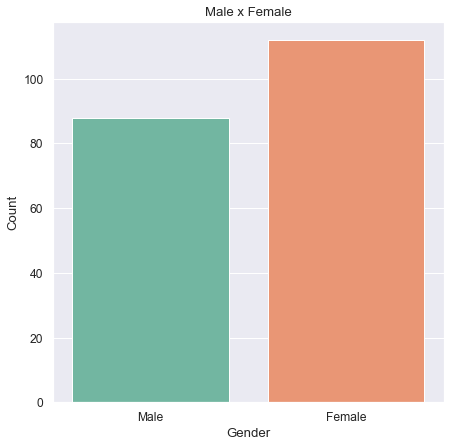

In [8]:
sns.countplot(df["Gender"],palette="Set2").set(ylabel="Count")
plt.title("Male x Female")
plt.show()

- Most users in mall data are females.

In [9]:
def dstplt(data,col,bins=None):
    '''
    This function plots the distribution of the data.
    INPUT:
    data: str. The name of the dataset.
    col: str. The name of the feature.
    bins: int. Number of bins into the shape.
    OUTPUT:
    Distplot shows the distribution of the entered data.
    '''
    sns.distplot(data[col],bins=bins)
    plt.title(col.title()+" Distribution")
    plt.show()

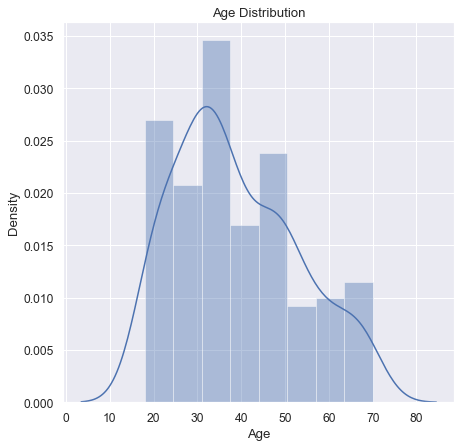

In [10]:
dstplt(df,"Age")

- Most users have 32 years old.
- Ages range from 18 to 70 years old.

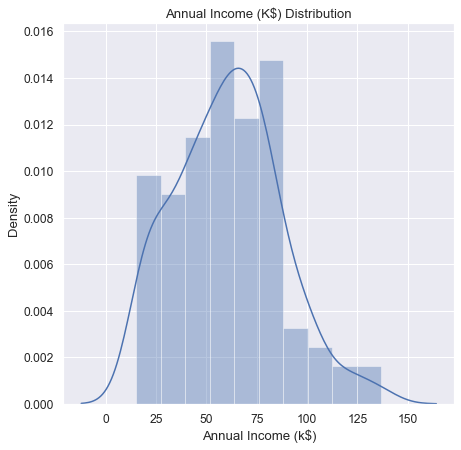

In [11]:
dstplt(df,"Annual Income (k$)")

- Annual Income ranges from 15k dollar to 137k dollar.

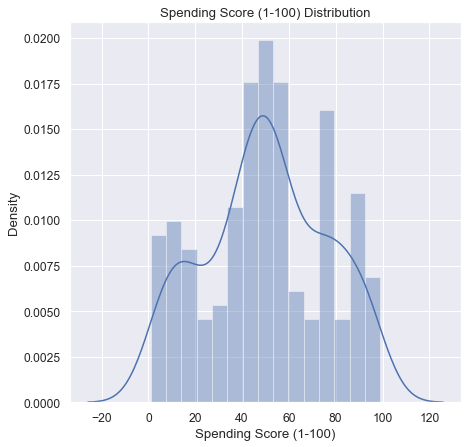

In [12]:
dstplt(df,"Spending Score (1-100)",15)

- Spending Score ranges from 1 to 99.

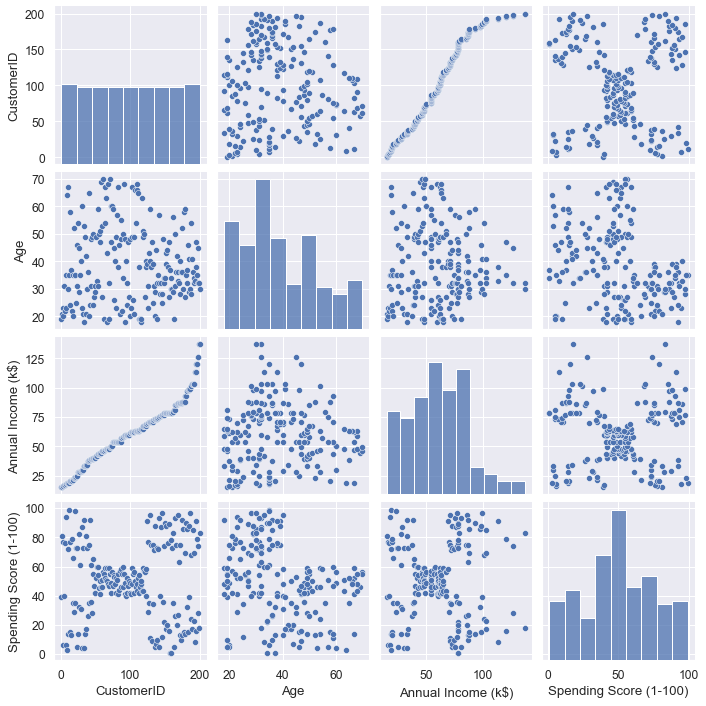

In [13]:
#The correlation between the data
sns.pairplot(df);

In [14]:
#Assigning x with Annual Income (k$), Spending Score (1-100)
x=df[[ 'Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


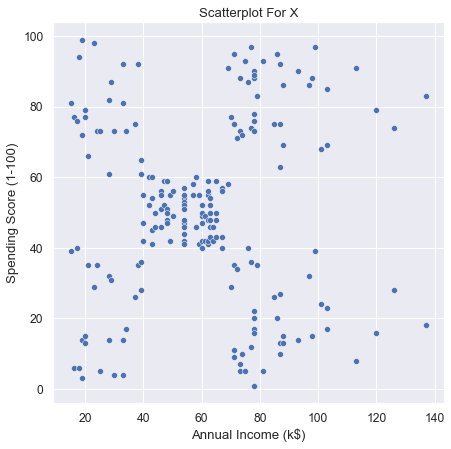

In [15]:
sns.scatterplot(x["Annual Income (k$)"],x["Spending Score (1-100)"])
plt.title("Scatterplot For X")
plt.show()

- From scatterplot i see this data need 5 clusters.

# Applying KMeans Algorithm

In [16]:
#Applying elbow method
scores=[]
for i in range(1,8):
    model=KMeans(n_clusters=i)
    model.fit(x[["Annual Income (k$)","Spending Score (1-100)"]])
    scores.append(model.inertia_)

In [17]:
scores

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458]

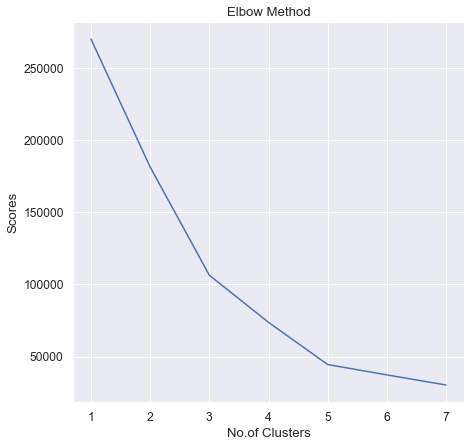

In [18]:
plt.plot(range(1,8),scores)
plt.xlabel("No.of Clusters")
plt.ylabel("Scores")
plt.title("Elbow Method")
plt.show()

- From this figure, number of optimal clusters equal to 5.

In [19]:
#Clusters prediction
model=KMeans(n_clusters=5)
clusters=model.fit_predict(x[["Annual Income (k$)","Spending Score (1-100)"]])
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [20]:
#Model inertia
model.inertia_

44448.45544793369

In [21]:
#Adding clusters feature into x
x["Clusters"]=clusters

In [22]:
x.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [23]:
#Clusters centroids
centroids=model.cluster_centers_
centroids

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

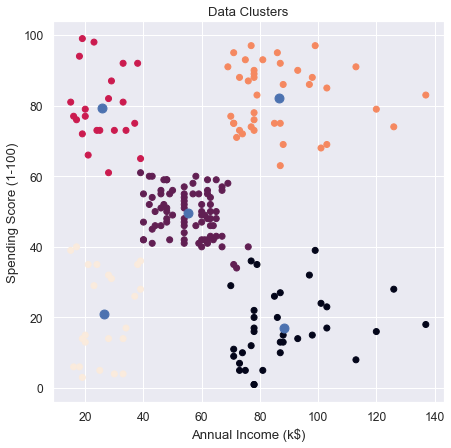

In [24]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=x["Clusters"])
plt.scatter(centroids[:,0],centroids[:,1],s=80,c="b")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data Clusters")
plt.show()

# Applying Hierarchical Clustering Algorithm

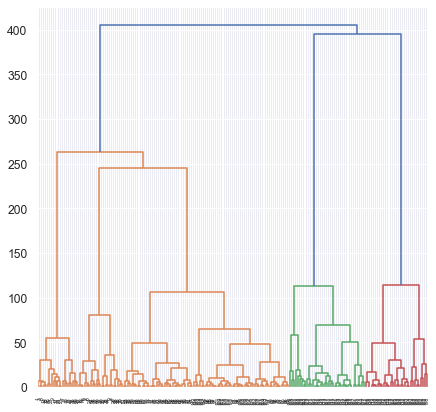

In [38]:
#Visualize dendrogram
#plt.figure(figsize=(15,15))
dendrogram=sch.dendrogram(sch.linkage(x[["Annual Income (k$)","Spending Score (1-100)"]],method="ward"))

- From this figure number of clusters equal to 5.

In [39]:
#Clusters prediction
model=AgglomerativeClustering(n_clusters=5)
clusters=model.fit_predict(x[["Annual Income (k$)","Spending Score (1-100)"]])
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [40]:
#Adding predicted clusters 
x["Clusters"]=clusters

In [41]:
x.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


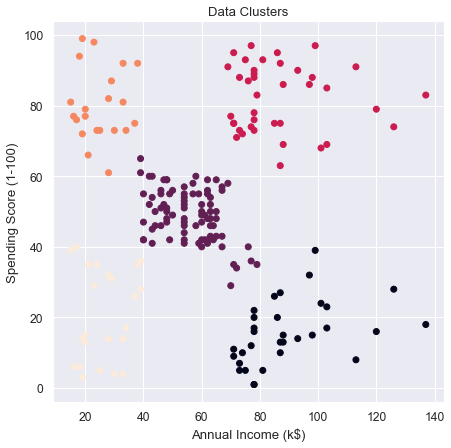

In [43]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=x["Clusters"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data Clusters")
plt.show()

# Conclusion

> - No.of clusters by elbow method equal to 5.
> - No.of clusters by dendrogram equal to 5.